# **CAR SALES DATASET** | Mystery Group

## **I. OBJECTIVE**

The objective of the analysis is to provide insights on market trends and customer preferences by using the existing dataset. Specifically, it aims to answer the following questions:

1. What are the key variables and their distribution?
2. Are there missing values or outliers in the data?
3. How do different variables relate to each other?
4. What trends or patterns can be observed?

## **II. PROBLEM STATEMENT**

With the rise and trend of electric vehicles, Chevrolet's electric models like Blazer EV performed well in the market. However, gas-powered SUVs had a [decline in sales](https://www.caranddriver.com/news/g63335108/auto-sales-q4-2024-winners-losers/). For instance, models such as the Blazer experienced a 20% drop, the Suburban 16%, and the Tahoe 5% in 2024.
While, GM's [global sales for the first half of 2024 totaled 2.78 million units](https://www.marklines.com/en/report/rep2752_202411), which is a  6.3% decrease from the same period the previous year, with significant losses reported in the Chinese market.

The changes in market trends led to challenges such as strong competition from other local brands in other countries, misalignment with consumer preferences and operational challenges.

## **III. BACKGROUND**

The dataset is a Sales Report that can be utilized for Market Trends and Predictive Analysis. While the exact source of the data is unknown, it has been widely downloaded and used by Kaggle users, receiving positive reviews and engagement, suggesting a level of reliability and completeness.

## **IV. DATA SOURCE**

The data was sourced from Vasu_Avasthi on Kaggle with title "Car Sales Report--A Detailed Analysis of Global Car Sales Trends". However, the origin of the data and the methods used for collection are unknown. The dataset covers the time period from 2022 to 2023 and is available in CSV format.

Link to dataset: https://www.kaggle.com/datasets/missionjee/car-sales-report/data

## **V. DATA DESCRIPTION**
The Car Sales Report provided by Vasu_Avasthi in Kaggle contains a total of 23,906 unique values and 16 columns of car sales report from different companies starting from 2022 to 2023 **(can be more specific)**. Several features **(or variables)** in the dataset are relevant to the Market Analysis objective of this project. Some relevant variables that will be utilized include ‘Model’, ‘Price’, and ‘Annual Income’ **(can be changed)**. Meanwhile the ‘Company’ variable will be filtered to ‘only Chevrolet’ for specification requirements compliance of focusing on only a single company **(TO DO)**. Specifically, the variables in the Car Sales Report dataset are **(can be removed)**:
* Car_id
* Date
* Customer Name
* Gender
* Annual Income
* Dealer_Name
* Company
* Model
* Engine
* Transmission
* Color
* Price ($)
* Dealer_No
* Body Style
* Phone
* Dealer_Region


## **VI. EXPLORATORY DATA ANALYSIS**

This cell imports essential libraries for the project: `pandas` for data manipulation, `numpy` and `math` for numerical operations, `matplotlib` and `seaborn` for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

loading the dataset [Car Sales Report dataset](https://www.kaggle.com/datasets/missionjee/car-sales-report/data) using pandas into DataFrame and assigning to `df` variable.

In [2]:
# Load CSV file into a DataFrame
df = pd.read_csv('Car Sales.xlsx - car_data.csv')

Check if the dataset was read successfully. Use the `head()` function to display the first few rows of the data frame.

In [3]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


### **1. Data Overview**

This cell outputs the summary statistics of the numerical columns such as `Annual Income`, `Price`, and `Phone`.

In [4]:
# Ouptut summary statistics of numerical columns
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y") # convert `Date` column to datetime format.
df['Year'] = df['Date'].dt.year # extract year from `Date` column

categorical_features = ['Year', 'Gender', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style', 'Model', 'Dealer_Name', 'Dealer_Region']

for col in categorical_features:
    print(f"Summary statistics for {col}:\n")
    print(df[col].describe())
    print("\n" + "-"*40 + "\n")

Summary statistics for Year:

count    23906.000000
mean      2022.554714
std          0.497008
min       2022.000000
25%       2022.000000
50%       2023.000000
75%       2023.000000
max       2023.000000
Name: Year, dtype: float64

----------------------------------------

Summary statistics for Gender:

count     23906
unique        2
top        Male
freq      18798
Name: Gender, dtype: object

----------------------------------------

Summary statistics for Company:

count         23906
unique           30
top       Chevrolet
freq           1819
Name: Company, dtype: object

----------------------------------------

Summary statistics for Engine:

count                         23906
unique                            2
top       DoubleÂ Overhead Camshaft
freq                          12571
Name: Engine, dtype: object

----------------------------------------

Summary statistics for Transmission:

count     23906
unique        2
top        Auto
freq      12571
Name: Transmission, dty

The cell below shows the dimensions (number of rows and columns) of the DataFrame.

In [6]:
# Data dimensions (numbers of rows and columns)
df.shape

(23906, 17)

Using the `info()` function to display the general information about the dataset such as data types and distribution.

In [7]:
# Data types and data distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

The following cells checks for the missing values in the DataFrame.

In [8]:
# Missing data
df.isnull()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23902,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
print(df.isnull().sum())

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
Year             0
dtype: int64


It can be seen that there is one missing value for `Customer Name` column. The next cell shows details on the instance with the missing value.

In [10]:
missing_index = df[df.isnull().any(axis=1)].index
print("Index of instance with missing value: \n", df.iloc[missing_index[0]])

Index of instance with missing value: 
 Car_id                        C_CND_007565
Date                   2022-11-05 00:00:00
Customer Name                          NaN
Gender                                Male
Annual Income                       680000
Dealer_Name               Saab-Belle Dodge
Company                              Dodge
Model                           Ram Pickup
Engine           DoubleÂ Overhead Camshaft
Transmission                          Auto
Color                           Pale White
Price ($)                            45000
Dealer_No                       60504-7114
Body Style                         Hardtop
Phone                              7203103
Dealer_Region                       Aurora
Year                                  2022
Name: 7564, dtype: object


There are two options that can be done to remove missing values:   
1. Drop the instance (row) with the missing value.
2. Drop the `Customer Name` column since it is unique and may not help in analysis.

### **2. Univariate Analysis**

This section analyzes individual variables to understand their distribution and key characteristics.

#### Histogram for Numerical Columns

The cells below uses histogram to visualize the distribution of individual numerical columns.

In [11]:
# Get numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# For numerical columns
num_cols = 3  # Number of columns for subplot grid
num_features = len(numerical_features)
num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed

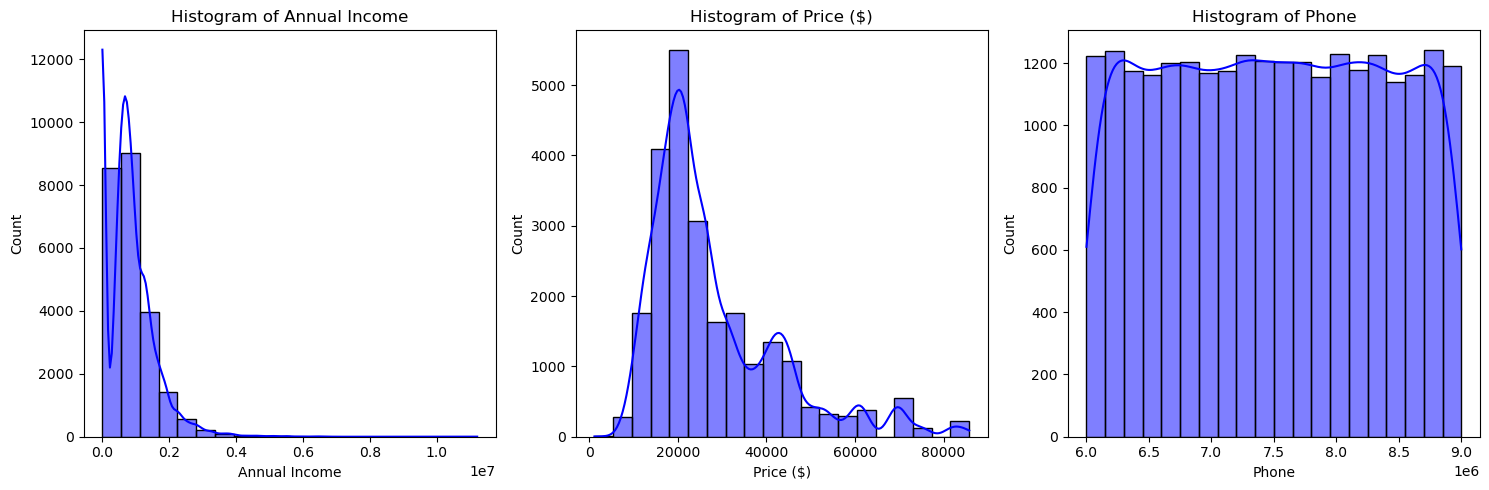

In [12]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color='blue')  # Histogram + KDE
    axes[i].set_title(f'Histogram of {col}', fontsize=12)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Box Plot for Numerical Columns

To further show the distribution, spread, and outliers of the numerical features, Box Plot was used for visualization.

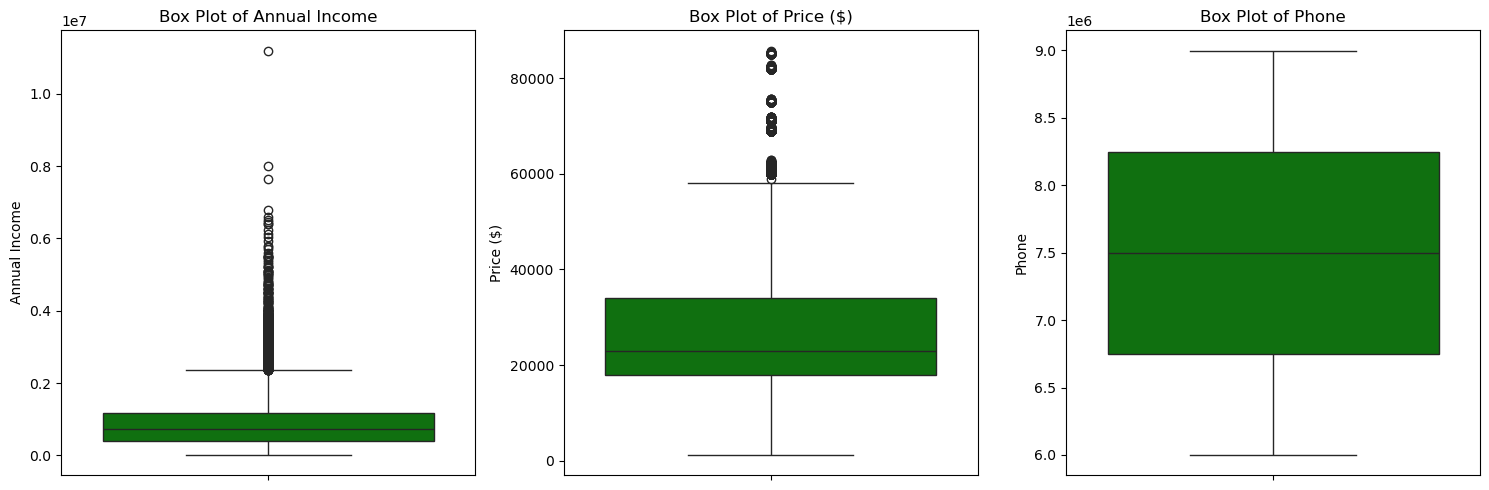

In [13]:
# Box Plot for Numerical Columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i], color='green')  # Box plot
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Bar Plot for Categorical Columns

For visualization of categorical variables, Bar Plot was used.

In [14]:
# Select categorical columns
categorical_features = ['Year', 'Gender', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style',  'Dealer_Name', 'Dealer_Region']

cat_cols = 2 # number of columns for subplot
cat_features = len(categorical_features)
cat_rows = math.ceil(cat_features / cat_cols) # number of rows for subplot

/var/folders/zb/4xbtyqzs0wn5pfnb9njxy5rw0000gn/T/ipykernel_27460/2260740295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='viridis')  # Bar plot
/var/folders/zb/4xbtyqzs0wn5pfnb9njxy5rw0000gn/T/ipykernel_27460/2260740295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='viridis')  # Bar plot
/var/folders/zb/4xbtyqzs0wn5pfnb9njxy5rw0000gn/T/ipykernel_27460/2260740295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='viridis')  # Bar 

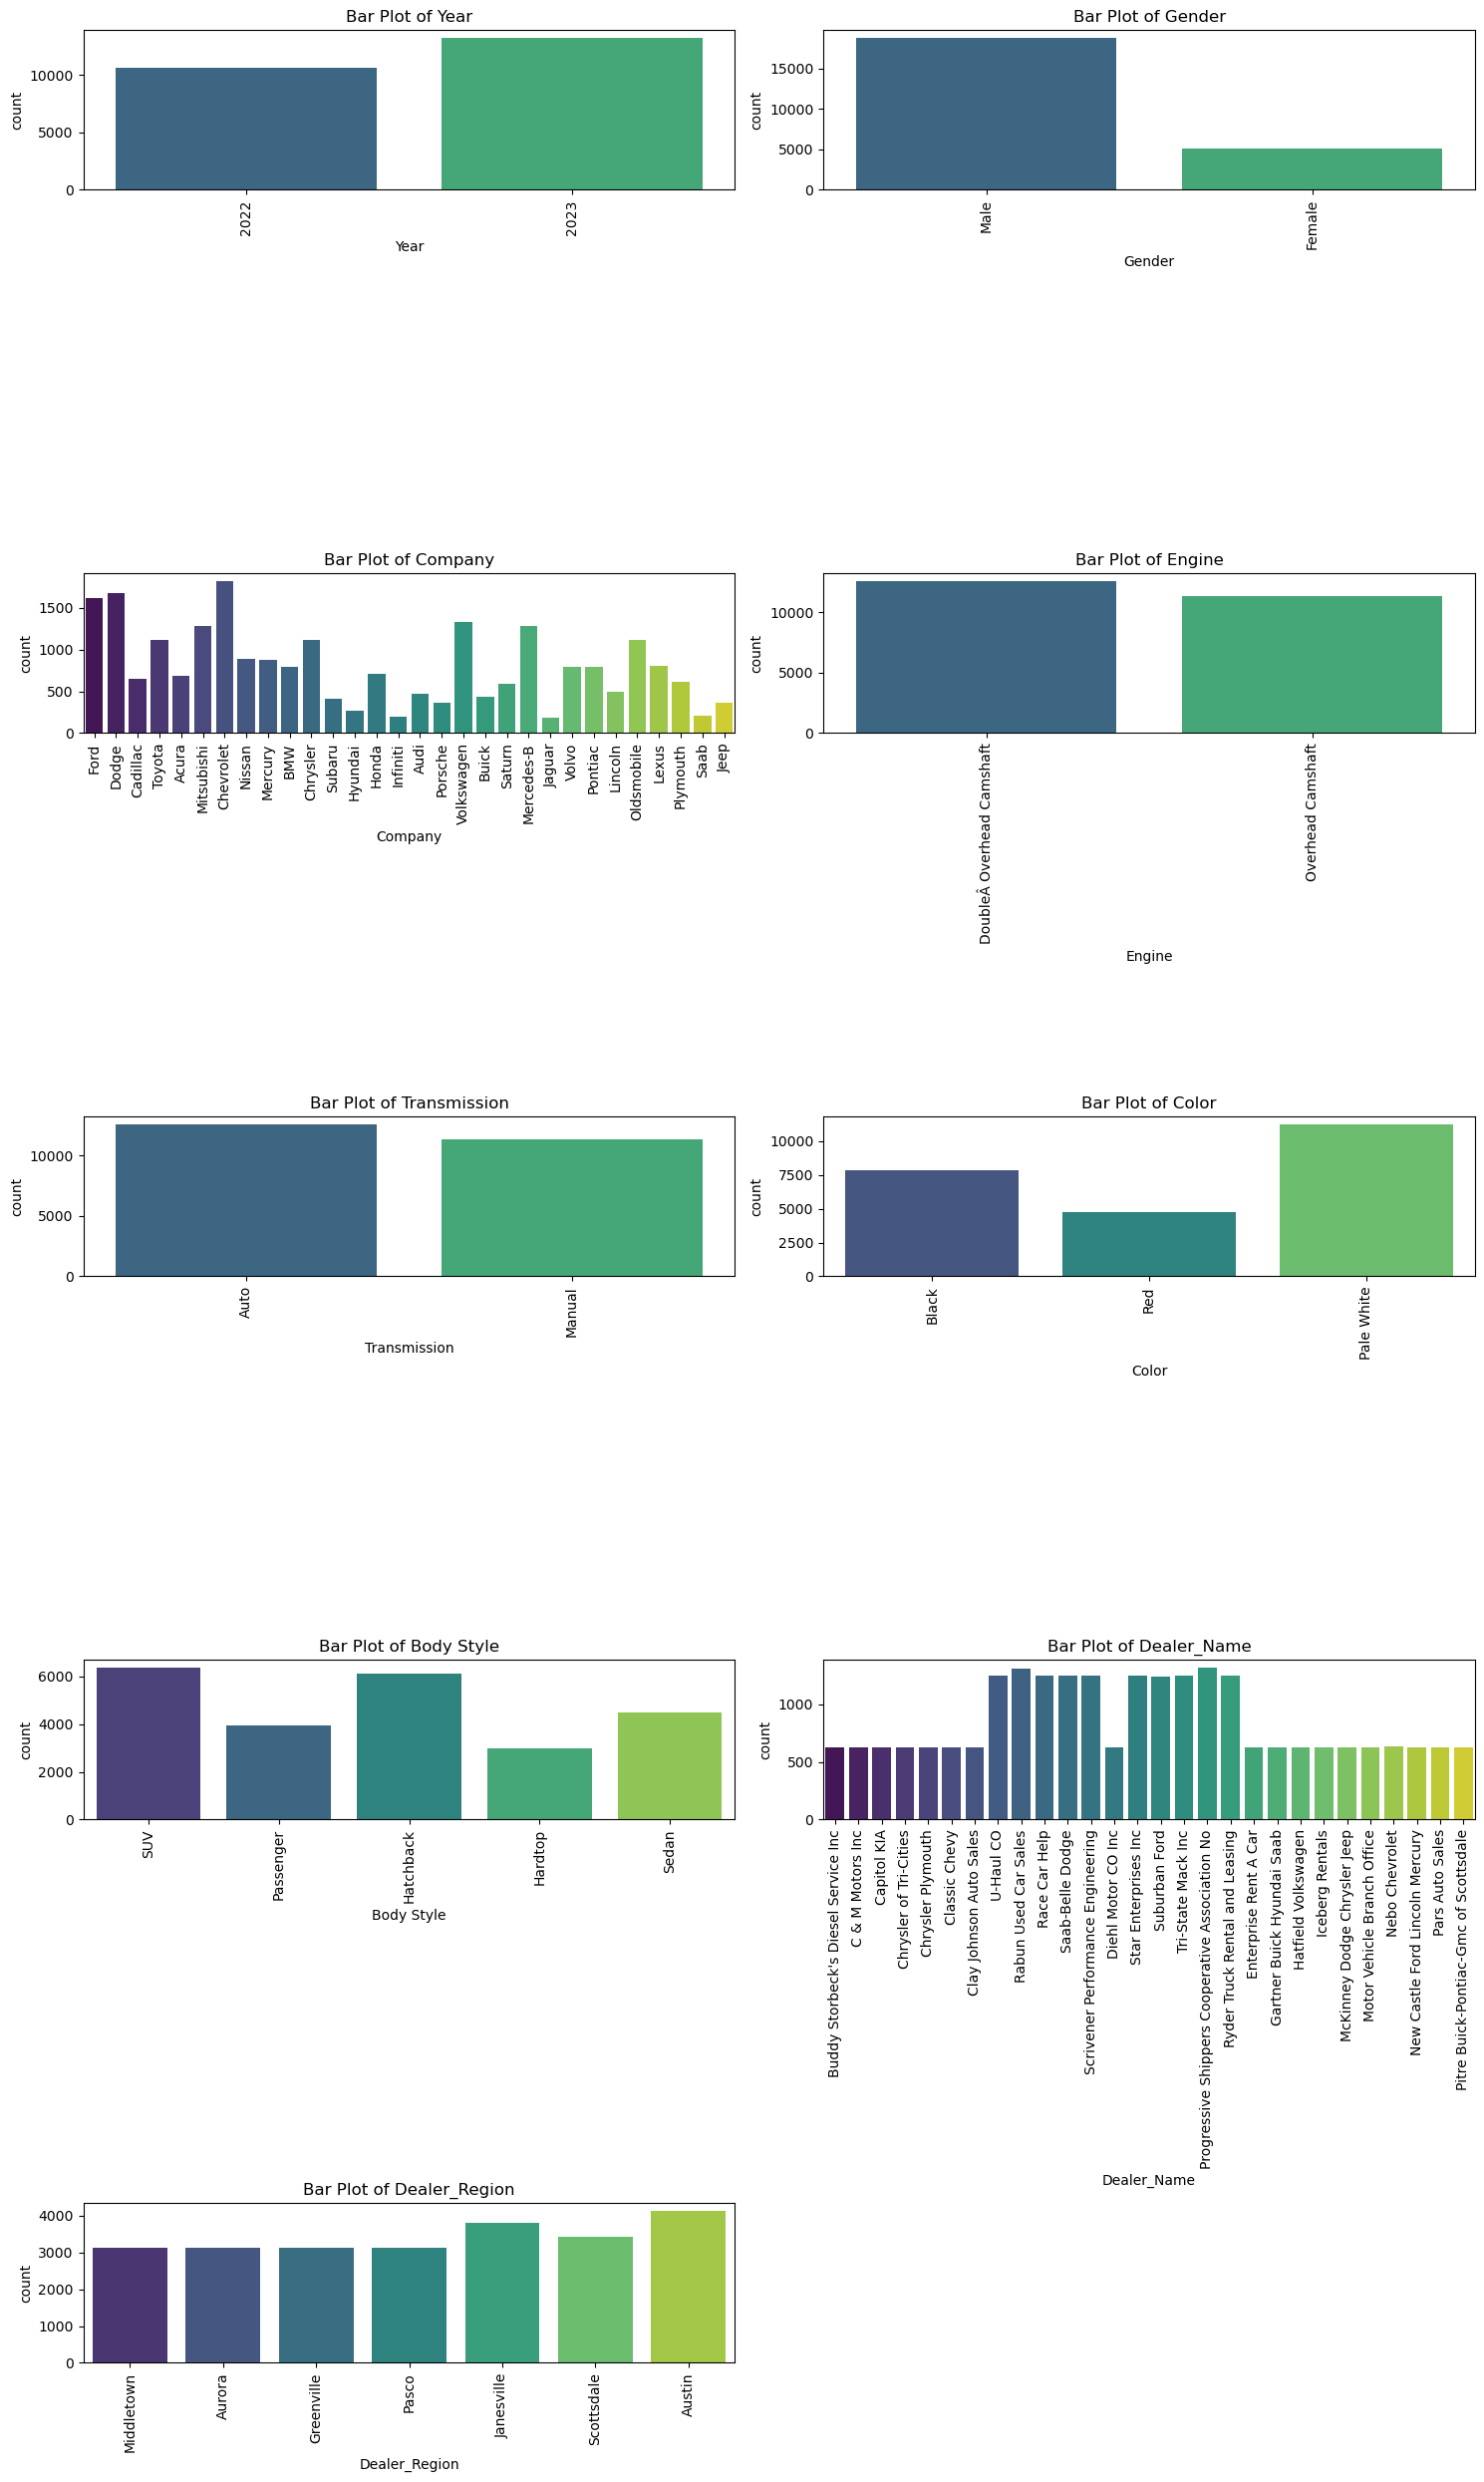

In [15]:
# Bar Plot for categorical features/columns
fig, axes = plt.subplots(nrows=cat_rows, ncols=cat_cols, figsize=(15, 5 * cat_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=df[col], ax=axes[i], palette='viridis')  # Bar plot
    axes[i].set_title(f'Bar Plot of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **3. Bivariate Analysis**
This section examines the relationship between two variables to identify patterns and correlations.

#### 1. Monthly sales for each year (2022 and 2023).

In [16]:
# Get instances with year 2022 and 2023
year2022 = df[df['Year'] == 2022]
year2023 = df[df['Year'] == 2023]

/var/folders/zb/4xbtyqzs0wn5pfnb9njxy5rw0000gn/T/ipykernel_27460/3158109770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2022.loc[:, '2022 Month'] = year2022['Date'].dt.month
/var/folders/zb/4xbtyqzs0wn5pfnb9njxy5rw0000gn/T/ipykernel_27460/3158109770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2023.loc[:, '2023 Month'] = year2023['Date'].dt.month
/var/folders/zb/4xbtyqzs0wn5pfnb9njxy5rw0000gn/T/ipykernel_27460/3158109770.py:7: FutureWarning: 

Passing `palette` without assigning `hue`

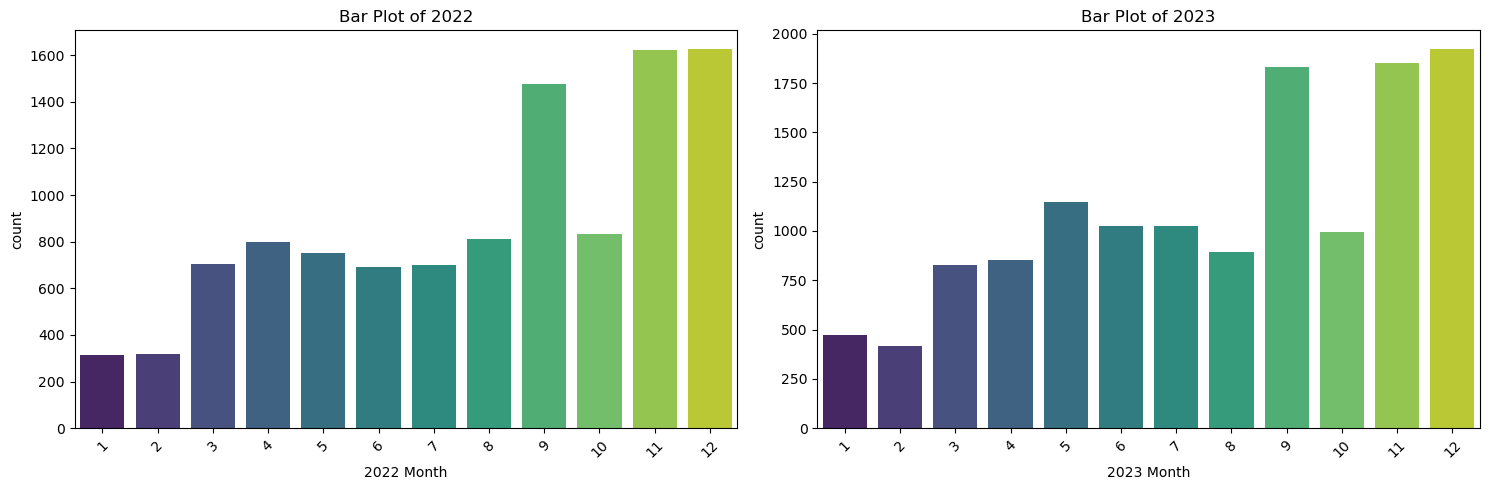

In [17]:
year2022.loc[:, '2022 Month'] = year2022['Date'].dt.month
year2023.loc[:, '2023 Month'] = year2023['Date'].dt.month

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Bar Plot for 2022
sns.countplot(x='2022 Month', data=year2022, ax=axes[0], palette='viridis')
axes[0].set_title('Bar Plot of 2022', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar Plot for 2023
sns.countplot(x='2023 Month', data=year2023, ax=axes[1], palette='viridis')
axes[1].set_title('Bar Plot of 2023', fontsize=12)  # Fixed incorrect title
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 2. Is there a correlation between a customer's annual income and the car price they purchase?

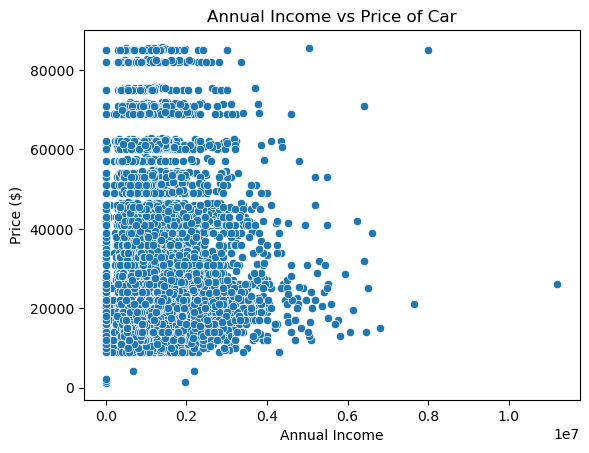

Correlation: 0.012064959420296463


In [18]:
# Scatter plot
sns.scatterplot(x=df["Annual Income"], y=df["Price ($)"])
plt.title("Annual Income vs Price of Car")
plt.show()

# Correlation
correlation = df["Annual Income"].corr(df["Price ($)"])
print("Correlation:", correlation)

In [19]:
# Calculations
from scipy.stats import pearsonr, spearmanr, kendalltau

# Pearson correlation
pearson_corr, _ = pearsonr(df["Annual Income"], df["Price ($)"])
print("Pearson correlation:", pearson_corr)

# Spearman correlation
spearman_corr, _ = spearmanr(df["Annual Income"], df["Price ($)"])
print("Spearman correlation:", spearman_corr)

# Kendall correlation
kendall_corr, _ = kendalltau(df["Annual Income"], df["Price ($)"])
print("Kendall correlation:", kendall_corr)

Pearson correlation: 0.012064959420297278
Spearman correlation: 0.016722940799853644
Kendall correlation: 0.011443538989835486


#### 3. Customer's average annual income per company

Company
Cadillac      913476.457055
Hyundai       894106.772727
Saab          892487.771429
Mercury       890657.229977
Toyota        876490.990090
Nissan        863774.747178
Infiniti      861800.923077
Buick         855929.840547
Volkswagen    854321.878470
Porsche       853423.822715
Volvo         837570.499366
Plymouth      834670.745543
Dodge         834585.241771
Mitsubishi    833272.748630
Chrysler      833011.186607
BMW           831186.075949
Oldsmobile    830651.319532
Mercedes-B    823098.915953
Audi          819655.626068
Saturn        816950.767918
Jeep          814149.966942
Ford          813954.126394
Acura         810430.190131
Chevrolet     799263.693238
Subaru        795085.550617
Lincoln       794274.695122
Pontiac       790448.979899
Honda         778164.860169
Lexus         776040.334165
Jaguar        732528.544444
Name: Annual Income, dtype: float64


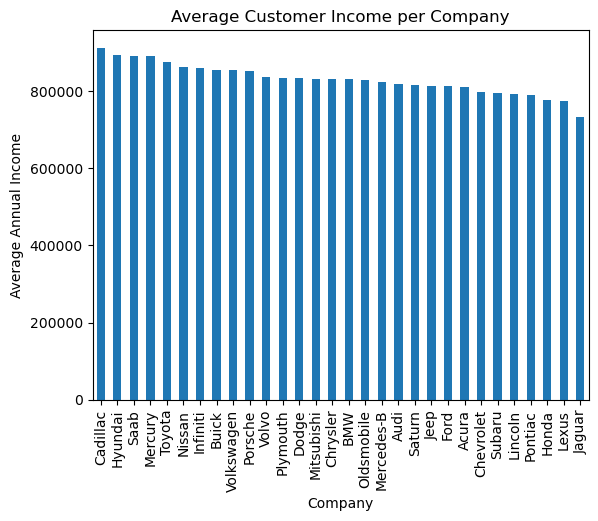

In [20]:
cusotmer_income = df.groupby("Company")["Annual Income"].mean().sort_values(ascending=False)
print(cusotmer_income)

# Bar plot
cusotmer_income.plot(kind='bar', title="Average Customer Income per Company")
plt.ylabel("Average Annual Income")
plt.show()

#### 4. Is there a significant difference in car prices based on gender?

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


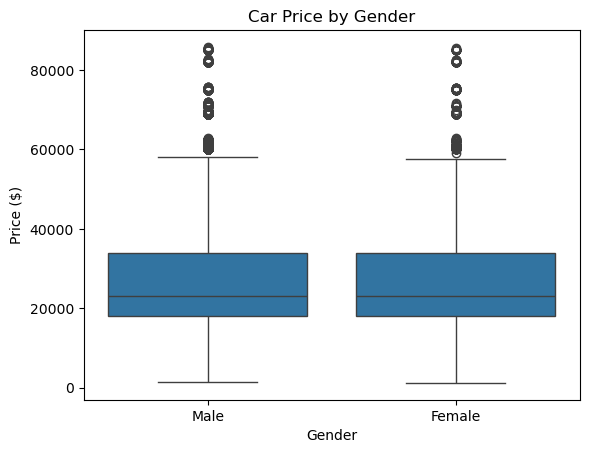

T-test p-value: 0.3081000140834217


In [21]:
price_by_gender = df.groupby("Gender")["Price ($)"].mean()
print(price_by_gender)

male_prices = df[df["Gender"] == "Male"]["Price ($)"]
female_prices = df[df["Gender"] == "Female"]["Price ($)"]

# Box plot
sns.boxplot(x=df["Gender"], y=df["Price ($)"])
plt.title("Car Price by Gender")
plt.show()

# Statistical test (T-test)
t_stat, p_value = stats.ttest_ind(male_prices, female_prices, nan_policy='omit')
print("T-test p-value:", p_value)

#### 5. Is there a significant difference in Engines based on gender?

Engine                     Gender
DoubleÂ Overhead Camshaft  Female    2699
                           Male      9872
Overhead Camshaft          Female    2409
                           Male      8926
dtype: int64


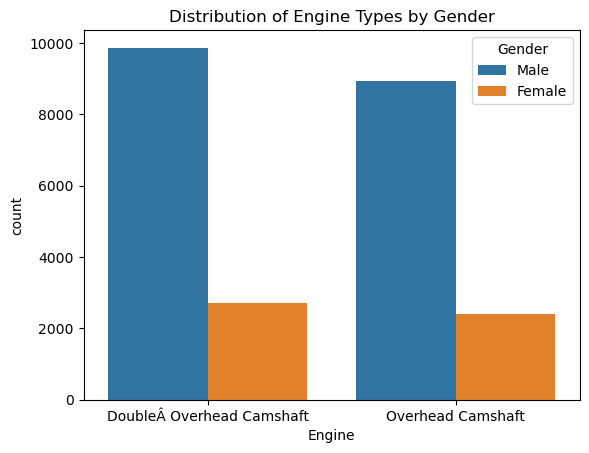

In [22]:
engine_by_gender = df.groupby(["Engine", "Gender"]).size()
print(engine_by_gender)

sns.countplot(data=df, x="Engine", hue="Gender")
plt.title("Distribution of Engine Types by Gender")
plt.show()

#### 6. Do car prices vary by dealer region?

Dealer_Region
Austin        28341.603628
Aurora        28334.626837
Greenville    28180.819054
Pasco         28119.039923
Scottsdale    27954.958928
Middletown    27856.338875
Janesville    27833.350955
Name: Price ($), dtype: float64


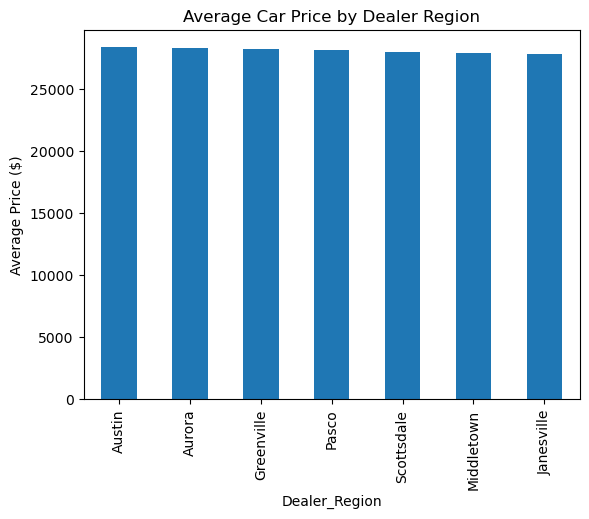

In [23]:
region_prices = df.groupby("Dealer_Region")["Price ($)"].mean().sort_values(ascending=False)
print(region_prices)

# Bar plot
region_prices.plot(kind='bar', title="Average Car Price by Dealer Region")
plt.ylabel("Average Price ($)")
plt.show()

#### 7. Is there a relationship between Transmission type and Price ($)?

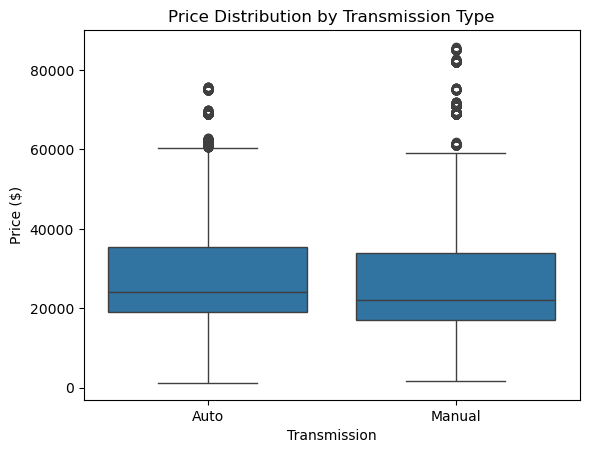

In [24]:
sns.boxplot(x=df["Transmission"], y=df["Price ($)"])
plt.title("Price Distribution by Transmission Type")
plt.show()

Transmission
Auto      28248.525972
Manual    27914.710631
Name: Price ($), dtype: float64


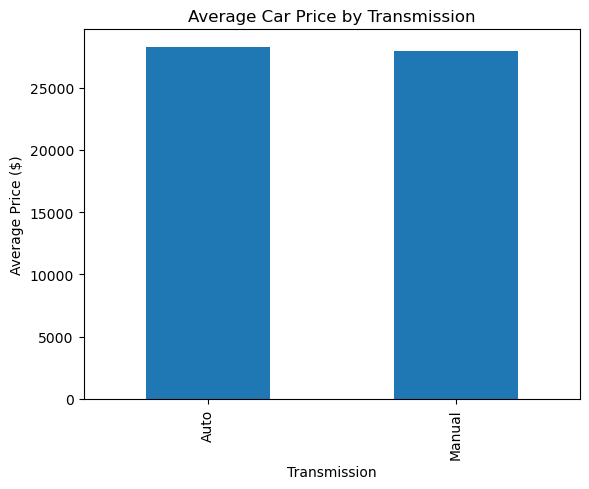

In [25]:
transmission_prices = df.groupby("Transmission")["Price ($)"].mean().sort_values(ascending=False)
print(transmission_prices)

# Bar plot
transmission_prices.plot(kind='bar', title="Average Car Price by Transmission")
plt.ylabel("Average Price ($)")
plt.show()

#### 8.  What is the relationship between Body Style and Price ($)?

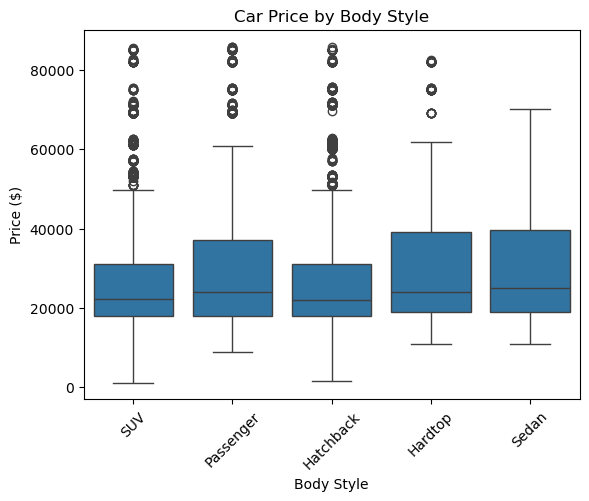

In [26]:
sns.boxplot(x=df["Body Style"], y=df["Price ($)"])
plt.xticks(rotation=45)
plt.title("Car Price by Body Style")
plt.show()

Body Style
Sedan        29832.802807
Hardtop      29151.096600
Passenger    28942.031686
Hatchback    27127.035574
SUV          26767.673204
Name: Price ($), dtype: float64


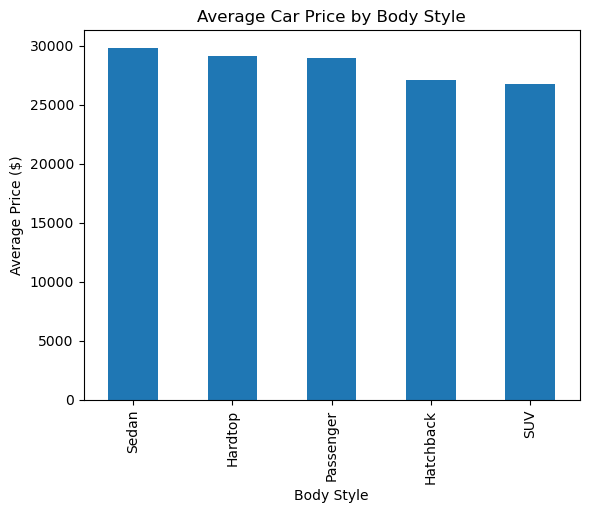

In [27]:
bodystyle_prices = df.groupby("Body Style")["Price ($)"].mean().sort_values(ascending=False)
print(bodystyle_prices)

# Bar plot
bodystyle_prices.plot(kind='bar', title="Average Car Price by Body Style")
plt.ylabel("Average Price ($)")
plt.show()

#### 9. Which company sells the most expensive cars?

Company
Cadillac      40972.093558
Saab          36516.338095
Lexus         34024.567332
Buick         33634.362187
Oldsmobile    31894.250225
Lincoln       31407.036585
Saturn        31092.609215
Toyota        29513.120721
Plymouth      29404.980551
Pontiac       29358.300251
Infiniti      29318.153846
Ford          29263.682156
Mercury       28535.163616
Honda         28082.959040
Subaru        27931.340741
Volvo         27788.593156
Nissan        27047.511287
Mercedes-B    26944.842802
Mitsubishi    26673.818324
Dodge         26406.341113
Chevrolet     26198.606377
Chrysler      26019.529464
Volkswagen    25568.552888
Jaguar        25138.194444
BMW           25090.622785
Acura         24758.561684
Audi          22851.790598
Porsche       22674.894737
Jeep          21057.338843
Hyundai       19386.234848
Name: Price ($), dtype: float64


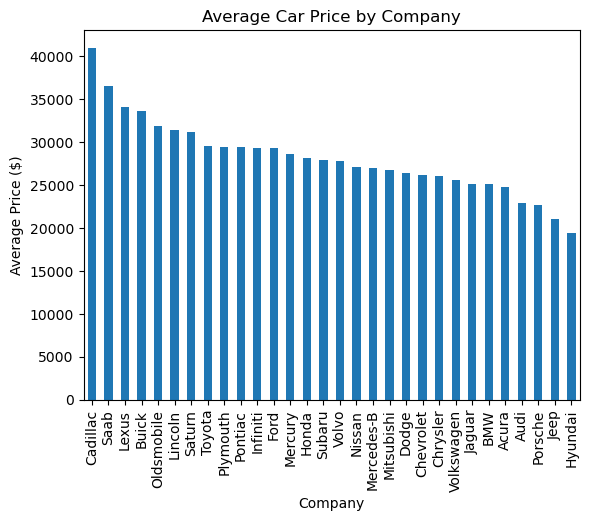

In [28]:
company_prices = df.groupby("Company")["Price ($)"].mean().sort_values(ascending=False)
print(company_prices)

# Bar plot
company_prices.plot(kind='bar', title="Average Car Price by Company")
plt.ylabel("Average Price ($)")
plt.show()

#### 10. Do certain dealers sell more expensive cars?

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

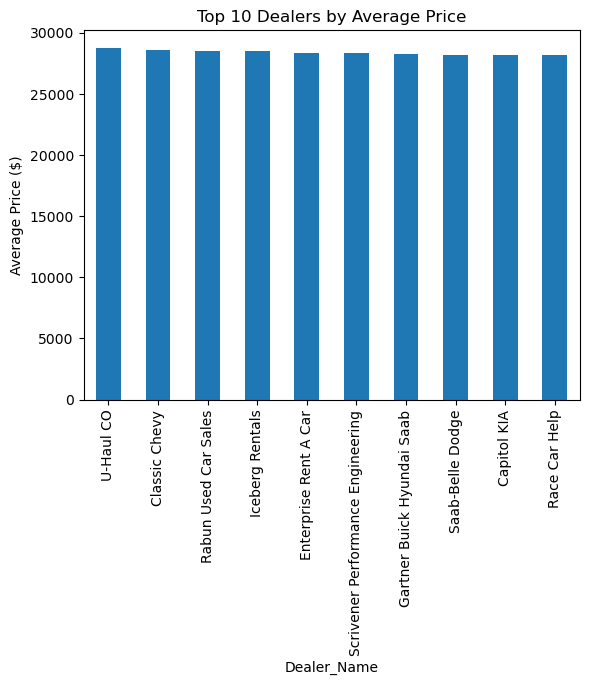

In [29]:
dealer_prices = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print(dealer_prices)

# Plot
dealer_prices.head(10).plot(kind='bar', title="Top 10 Dealers by Average Price")
plt.ylabel("Average Price ($)")
plt.show()

#### 11. What are the total sales by month, year, and company?

<Figure size 1000x500 with 0 Axes>

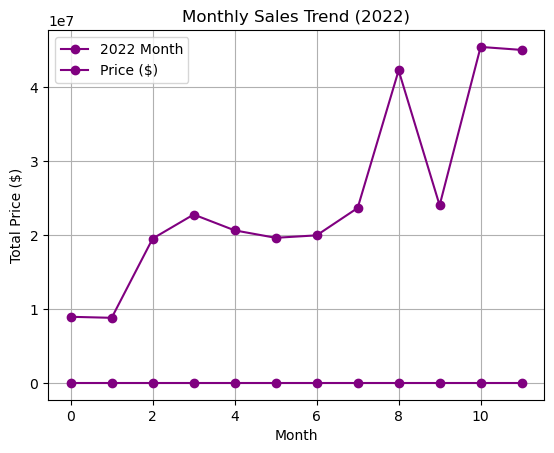

In [30]:
month_sales = year2022.groupby('2022 Month')['Price ($)'].sum().reset_index()

plt.figure(figsize=(10, 5))
month_sales.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Sales Trend (2022)")
plt.xlabel("Month")
plt.ylabel("Total Price ($)")
plt.grid()
plt.show()

<Figure size 1000x500 with 0 Axes>

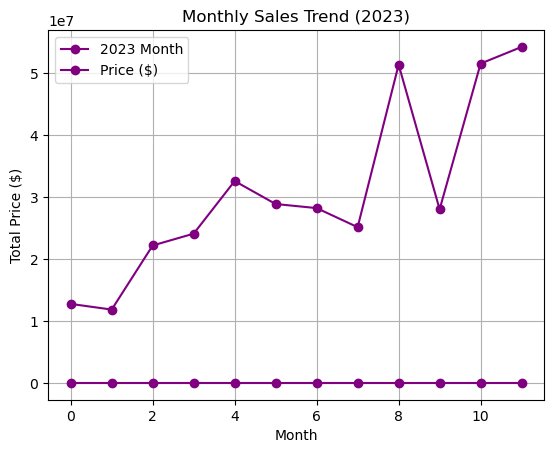

In [31]:
month_sales = year2023.groupby('2023 Month')['Price ($)'].sum().reset_index()

plt.figure(figsize=(10, 5))
month_sales.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Sales Trend (2023)")
plt.xlabel("Month")
plt.ylabel("Total Price ($)")
plt.grid()
plt.show()

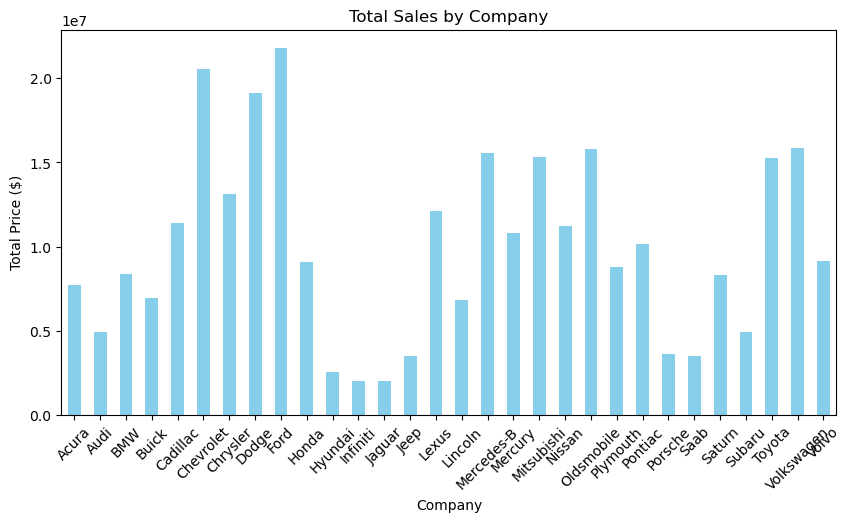

In [32]:
company_sales = year2022.groupby('Company')['Price ($)'].sum()

plt.figure(figsize=(10, 5))
company_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Company")
plt.xlabel("Company")
plt.ylabel("Total Price ($)")
plt.xticks(rotation=45)
plt.show()

### **4. Multivariate Analysis**

This section examines the relationship between multiple variables to identify complex patterns.

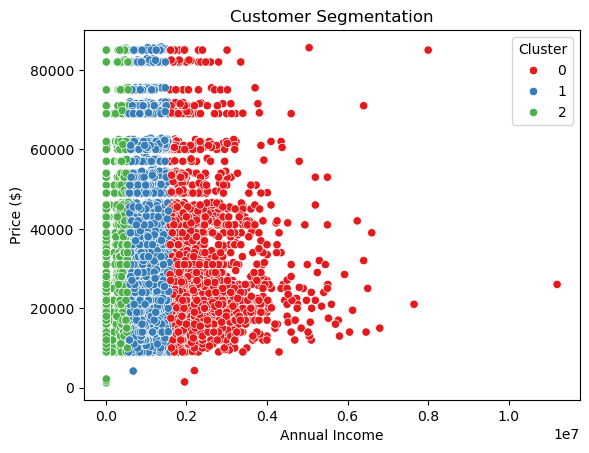

In [33]:
from sklearn.cluster import KMeans

# Select numeric columns
X = df[['Annual Income', 'Price ($)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot of clusters
sns.scatterplot(x=df["Annual Income"], y=df["Price ($)"], hue=df["Cluster"], palette="Set1")
plt.title("Customer Segmentation")
plt.show()

In [34]:
df['Engine']

0        DoubleÂ Overhead Camshaft
1        DoubleÂ Overhead Camshaft
2                Overhead Camshaft
3                Overhead Camshaft
4        DoubleÂ Overhead Camshaft
                   ...            
23901            Overhead Camshaft
23902    DoubleÂ Overhead Camshaft
23903            Overhead Camshaft
23904    DoubleÂ Overhead Camshaft
23905    DoubleÂ Overhead Camshaft
Name: Engine, Length: 23906, dtype: object

#### 1. How do annual income, car price, and body style influence customer preferences across different dealer regions?

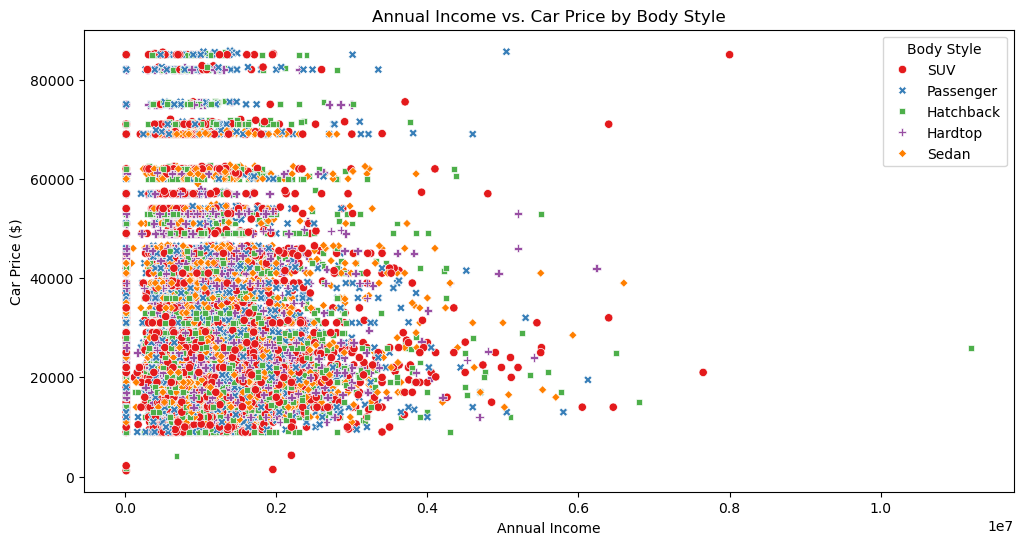

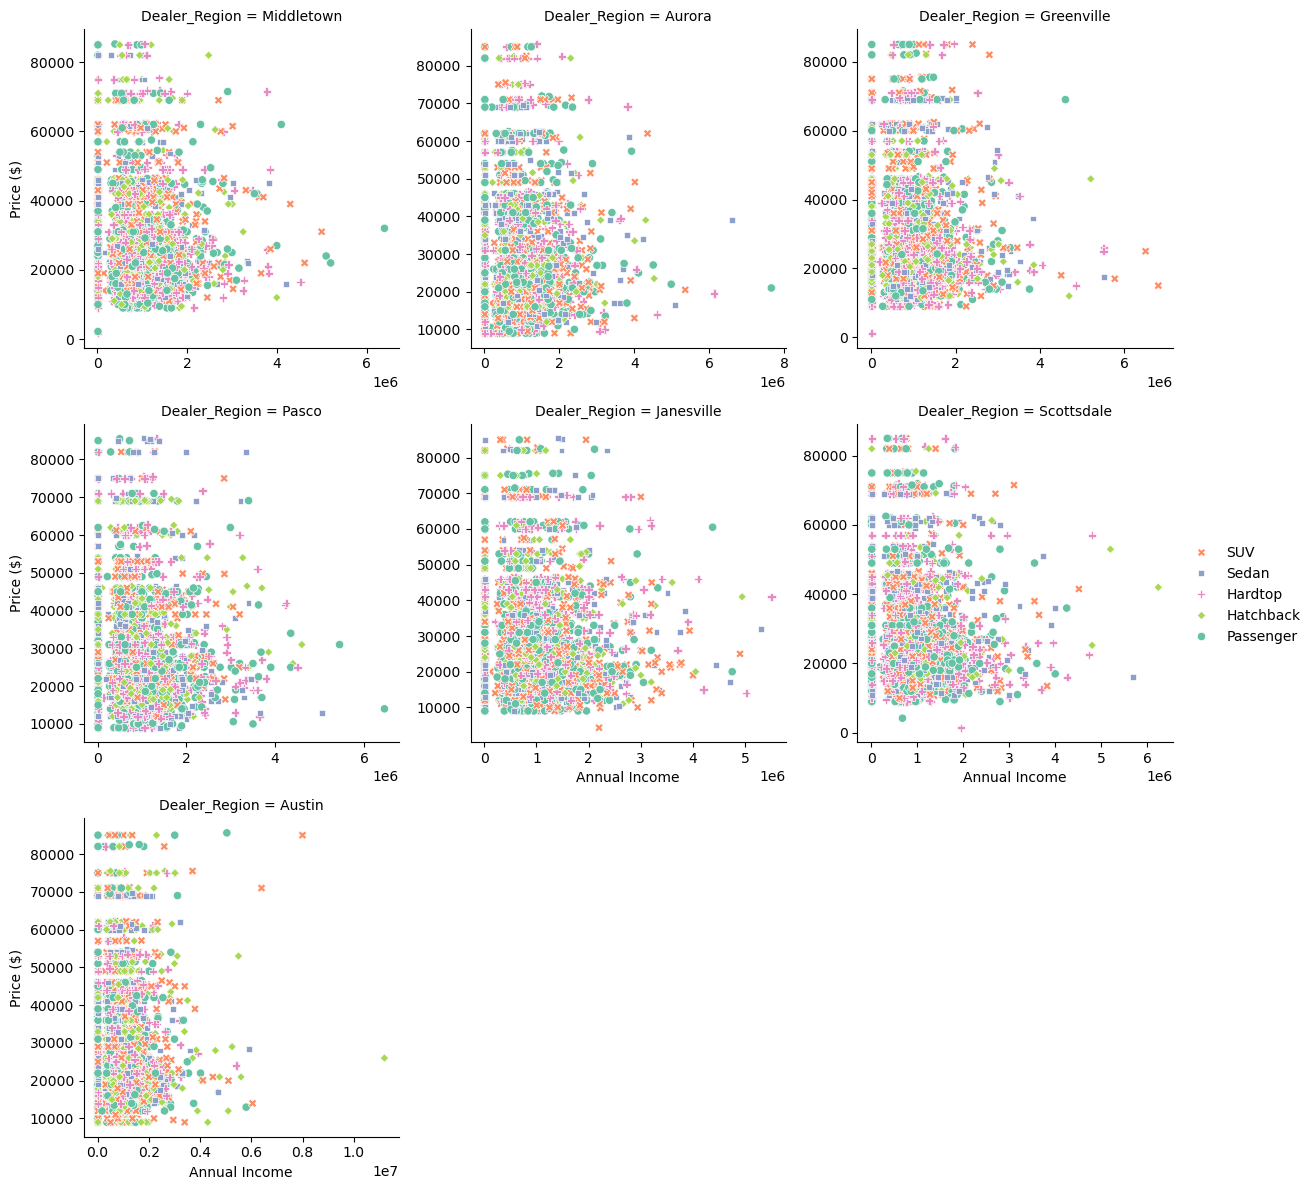

In [35]:
# Create a scatter plot to analyze the relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df["Annual Income"],
    y=df["Price ($)"],
    hue=df["Body Style"],
    style=df["Body Style"],
    palette="Set1"
)

plt.title("Annual Income vs. Car Price by Body Style")
plt.xlabel("Annual Income")
plt.ylabel("Car Price ($)")
plt.legend(title="Body Style")
plt.show()

# Faceted plot by Dealer Region
g = sns.FacetGrid(df, col="Dealer_Region", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="Annual Income", y="Price ($)", hue="Body Style", style="Body Style", palette="Set2")
g.add_legend()
plt.show()

#### 2. How do annual income, car price, and engine type relate to each other?

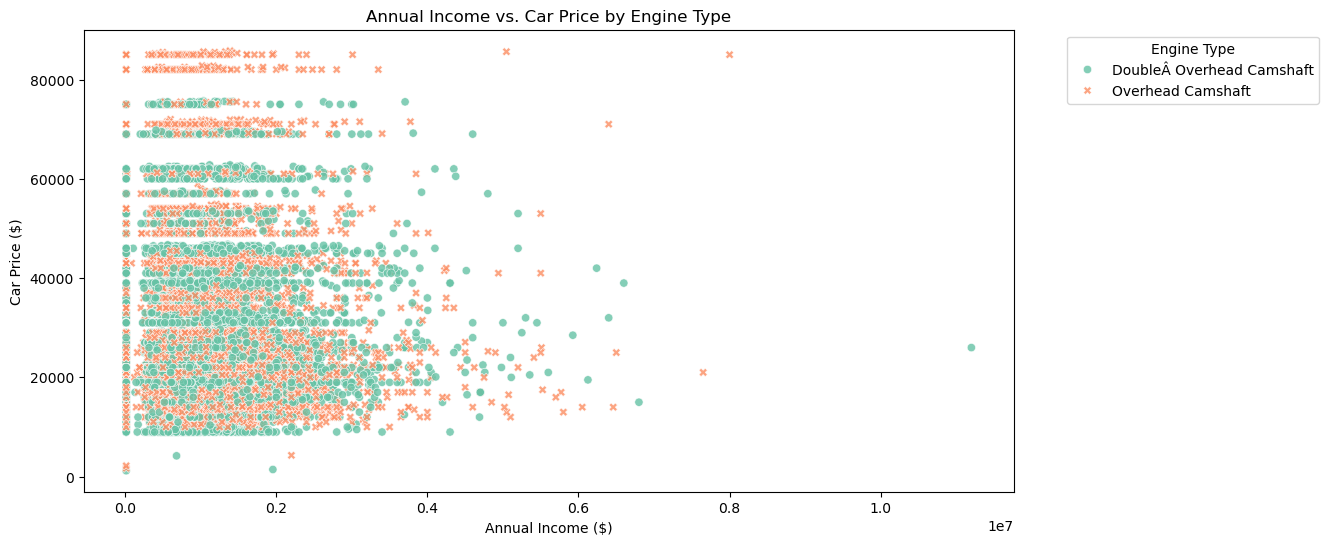

In [36]:
# Scatter plot with hue representing Engine type
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df["Annual Income"],
    y=df["Price ($)"],
    hue=df["Engine"],
    style=df["Engine"],
    palette="Set2",
    alpha=0.8
)

plt.title("Annual Income vs. Car Price by Engine Type")
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Price ($)")
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## **VII. APPROACH**

The dataset contains 23,906 entries and 16 columns in total and was loaded into a Pandas DataFrame. In the dataset, missing data was very minimal with only one missing entry in the Customer Name column. Visualizations such as histograms and box plots were plotted to gain insights and also allow trends in numerical columns to be analyzed. Furthermore, data was grouped by categorical variables such as Company, Model, and Dealer_Region in order to observe sales trends patterns.

The approach involved:


Data Preprocessing:
- Missing values were checked and handled appropriately.
- The `Date` column was converted to a datetime format.

EDA:
- Summary statistics was used to understand how the data was distributed
- Visualized numerical variables with histograms and box plots
- Categorical variables were visualized using bar plots

Bivariate Analysis:
- Correlation analysis between `annual income` and `car price`.
- Examined different correlations between `body stype`, `transmission type`, and `price`
- Examined montly sales trends
- Examined regional differences in accordance to car prices

Multivariate Analysis:
- Plotted a scatter plot of `annual income` vs. `car price`, with `body style` as the hue and style.
- Visualize whether certain `body styles` are preferred by different `annual income` groups.
- Facet grid plots break down the scatter plot by `dealer region`.
- Compare customer preferences and `car price` variations across different `regions`.
- Used `engine type` as the hue and style in a scatter plot of `annual income` vs. `car price`.
- Determine if certain `engine types` are more popular among specific `annual income` groups.

Tools:
- `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy.stats`




## **VIII. EDA RESULTS**

Our analysis showed that annual income and price varied a lot across different car models and brands. Box plots showed some possible outliers in income and price. The dataset contains car companies, models, and dealer regions wherein it is suggested that customer location and financial status affect purchasing decisions. The dataset was structured well since there was barely any missing data.

The data is densely packed in the lower income and price ranges, indicating that most cars are purchased in the lower-to-mid price range. Vehicles' body types are present across various price points and don’t show a clear trend toward any specific income group. There is no strong upward trend, meaning annual income does not have a strict linear correlation with car price.

## **KEY INSIGHTS**

### **Insights based on Objectives:**
  
*Key Variables*
  - Numerical: Annual Income and Price
  - Categorical: Dealer_Name, Model, Date (Year and Month), Gender, Company, Engine, Transmission, Color, Body Style, and Dealer_Region

*Missing Values*
  - There was only one instance that had a missing value (Customer Name). Hence, two options were taken to consider to handle this issue: (1) drop the instance that had missing Customer Name, or (2) drop the entire 'Customer Name' column. The first option may seem efficient, however, since the column is unique and cannot help in the determining trends or preferences, the decision leans towards to deleting the entire 'Customer Name' column.
  - However, since there is a possibility of filtering the entire dataset to 'Chevrolet' company, the missing values will not affect the dataset since 'Dodge' is the company of the instance with missing value. Hence, no dropping of instance or column.
  
*Outliers*
  - Specifically, the 'Price' (in dollar) and 'Annual Income' (of the customer) are two variables that showed high number of outliers.

*Trends and Patterns Observed*
  - The top values for each variables indicates that 78.63% of the customers of car sales are men, and Chevrolet has the highest number of sales during 2022 and 2023.
  - The customers prefer DoubleA Overhead Camshaft Engine
  - The customers prefer Automatic Transmission even though its pricey than Manual Transmission.
  - Sales from the month of September, November and December are typically high and is seen in both years (2022 and 2023), which could be due to year-end promotions. While, January and February are not the most ideal months for car sales.
  - Customers of 'Cadillac' company have a higher average annual income of around \$900,000, while 'Chevrolet' is 24th on the list of 30 car brands, with an average annual income of around \$800,000.
  - Average price of 'Cadillac' cars is around \$40,000. While average price of 'Chevrolet' cars is around \$25,000.


---

### **Other Insights:**
- In Bivariate analysis, car price by specific category measures only the average. It would be better to use sum to compute the "total" sales made per category.
- We can compare the monthly sales from 2022 to the monthly sales of 2023 to reveal if seasonal trend is consistent, or if there are variances.
- We can compare the car prices by engine types.
- Skewness of data can be addressed using Data Transformation techniques like log transformation, cuberoot transformation, etc.

# **PART II**

## **Methodology**

Our chosen method for analysis is classification. Since the objective is to classify customers as high or low spenders based on car prices, a classification approach is the most appropriate. Specifically, we will use a supervised learning model, as we have labeled data (spending category: High = 1, Low = 0).

#### Tools and Libraries



We will use Python and the following libraries:
- 	pandas – for data manipulation and preprocessing
- 	scikit-learn – for machine learning models and evaluation
- 	matplotlib & seaborn – for data visualization
- 	statsmodels – for statistical analysis (if needed)



#### Features

The following features were selected for the model:
- Gender: The customer’s gender (e.g., Male, Female).
- Annual Income: The yearly income of the customer, which is a key indicator of purchasing power.
- Transmission: The type of transmission in the purchased vehicle (e.g., Automatic, Manual).
- Body Style: The category of the vehicle purchased (e.g., SUV, Sedan, Coupe).
- Dealer Region: The geographical region of the dealer, which may influence price variations.
- Color: The color of the purchased vehicle, which might indicate customer preferences.
- Engine: The type of engine used in the car, which could be associated with pricing.

These features were chosen because they may correlate with the spending behavior of customers.

#### Model Selection

We will explore the following classification models:
 1.	Logistic Regression – a simple and interpretable baseline model for binary classification.
 2.	K-Nearest Neighbors (KNN) – useful for non-linear relationships and robust with different data distributions.
 3.	Decision Trees - a tree-based model that recursively splits data into branches based on feature importance, making decisions interpretable.

We will observe the performance of the models based on metrics such as accuracy, precision, recall, and F1-score.



#### Feature Engineering and Data Preprocessing

 1.	Handling Categorical Variables:
	•	Convert categorical features like Gender, Body Style, Transmission, and Dealer Region into numerical form using one-hot encoding.
 2.	Scaling Features:
	•	Standardize numerical features such as Annual Income using MinMaxScaler or StandardScaler for models sensitive to feature scaling (e.g., KNN, SVM).
 3.	Handling Missing Data:
	•	Fill missing values using mean/median imputation for numerical features.
	•	Use mode imputation or introduce an “unknown” category for categorical features.
 4.	Splitting Data:
	•	Use an 80-20 train-test split to train and evaluate models.
 5.	Hyperparameter Tuning:
	•	Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters.
 6.	Model Evaluation:
	•	Use Confusion Matrix, ROC Curve, and Classification Report to evaluate model performance.

### **Data Preparation**

This section prepares the data for model training

#### Import Libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Create a copy of df to avoid modifying the original DataFrame

In [38]:
copy_df = df.copy()

In [39]:
copy_df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Cluster
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,2
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,2
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1


Check for null values

In [40]:
print(copy_df.isnull().sum())

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
Year             0
Cluster          0
dtype: int64


Drop instance/row with missing value

In [41]:
copy_df = copy_df.drop(index=missing_index, axis=0)

#### Feature Engineering

Get the median of Price ($) in df and df_filtered

In [42]:
median = copy_df['Price ($)'].median()

Create new column called Spending Category in copy_df

In [43]:
copy_df['Spending Category'] = (copy_df['Price ($)'] > median).astype(int)

Check class balance

In [44]:
copy_df['Spending Category'].value_counts()

Spending Category
0    12067
1    11838
Name: count, dtype: int64

Drop unused columns/features

In [45]:
copy_df = copy_df.drop(
    ['Car_id', 'Date', 'Customer Name', 'Phone', 'Dealer_Name', 'Company', 'Model', 'Dealer_No ', 'Cluster', 'Price ($)', 'Year'], 
    axis=1
)

In [46]:
print(copy_df.columns)

Index(['Gender', 'Annual Income', 'Engine', 'Transmission', 'Color',
       'Body Style', 'Dealer_Region', 'Spending Category'],
      dtype='object')


#### One-Hot Encoding Categorical Numbers

In [47]:
# List of categorical columns to encode
categorical_columns = ['Gender', 'Transmission', 'Body Style', 'Dealer_Region', 'Color', 'Engine']

# Apply one-hot encoding while dropping the first category to avoid multicollinearity
copy_df = pd.get_dummies(copy_df, columns=categorical_columns, drop_first=False)

Check the dataframe

In [48]:
copy_df.shape
copy_df.head()

,Annual Income,Spending Category,Gender_Female,Gender_Male,Transmission_Auto,Transmission_Manual,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,...,Dealer_Region_Greenville,Dealer_Region_Janesville,Dealer_Region_Middletown,Dealer_Region_Pasco,Dealer_Region_Scottsdale,Color_Black,Color_Pale White,Color_Red,Engine_DoubleÂ Overhead Camshaft,Engine_Overhead Camshaft
0,13500,1,False,True,True,False,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False
1,1480000,0,False,True,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,1035000,1,False,True,False,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
3,13500,0,False,True,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
4,1465000,1,False,True,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,True,False


#### Splitting Dataset into Train and Test Sets

In [49]:
# Split Data
X = copy_df.drop(columns=['Spending Category'])
y = copy_df['Spending Category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16733, 22)
(7172, 22)
(16733,)
(7172,)


## **Model and Analysis**

This section includes training model and analysis of results

### **Model 1: Decision Tree**

#### Training the Model

In [51]:
# Create Decision Tree Model
model1 = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)

In [52]:
# Train Model
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [53]:
# Make Prediction
y_pred = model1.predict(X_test)

#### Metrics

In [54]:
# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5552147239263804

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.42      0.49      3674
           1       0.53      0.70      0.60      3498

    accuracy                           0.56      7172
   macro avg       0.56      0.56      0.55      7172
weighted avg       0.56      0.56      0.55      7172



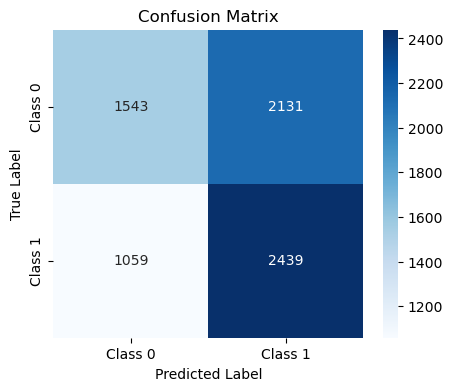

In [55]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

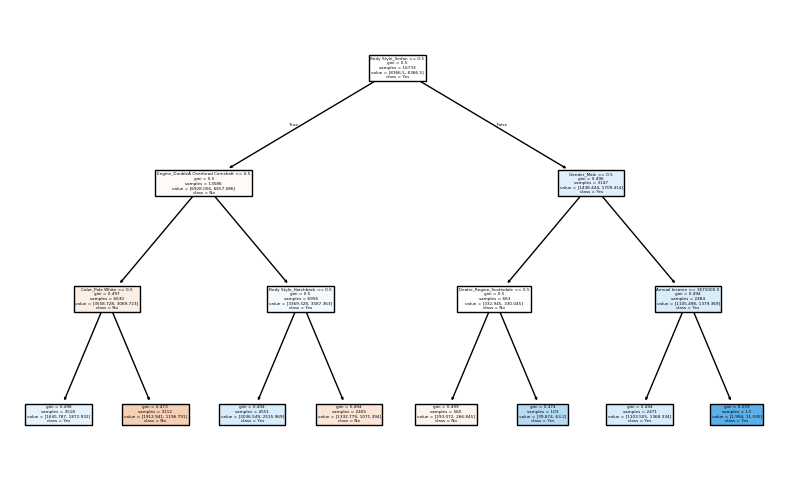

In [56]:
# Show Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model1, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

### **Model 2: Logistic Regression**

#### Training the Model

In [57]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [58]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [59]:
# Predict on test data
y_pred = log_reg.predict(X_test)

#### Metrics

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.5264
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      3674
           1       0.51      0.53      0.52      3498

    accuracy                           0.53      7172
   macro avg       0.53      0.53      0.53      7172
weighted avg       0.53      0.53      0.53      7172



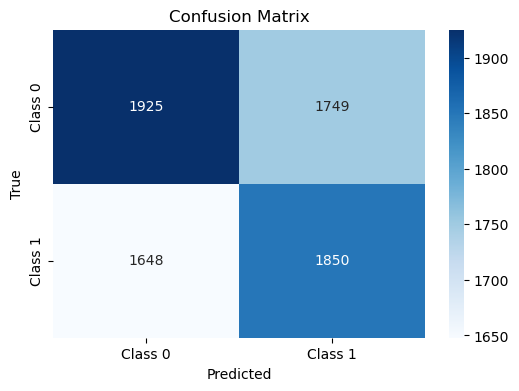

Confusion Matrix:
[[1925 1749]
 [1648 1850]]


In [61]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, you can print the confusion matrix
print("Confusion Matrix:")
print(cm)

#### Improving the Model

In [62]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
log_reg = grid.best_estimator_

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}


In [63]:
# Get the best estimator from GridSearchCV
log_reg = grid.best_estimator_

# Predict using the retrained model on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the retrained model: {accuracy:.4f}")

Accuracy of the retrained model: 0.5264


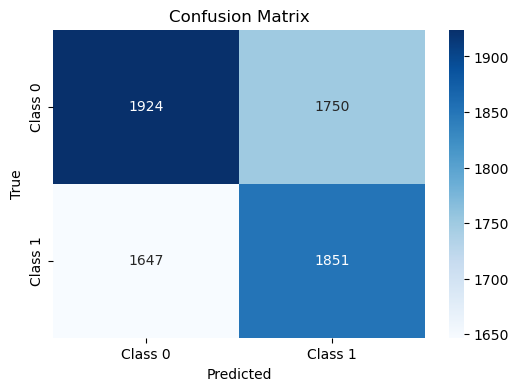

Confusion Matrix:
[[1924 1750]
 [1647 1851]]


In [64]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, you can print the confusion matrix
print("Confusion Matrix:")
print(cm)

### **Model 3: K-Nearest Neighbors**

## Key Findings / Insights

This section summarizes the discoveries derived from your analytics work.